STEP-1 IMPORTING THE LIBRARY AND DATASETS

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading data from link
url = "http://bit.ly/w-data"
dn = pd.read_csv(url)


In [ ]:
dn.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


STEP-2 VISUALIZING THE DATASET

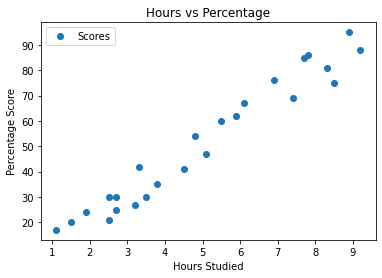

In [ ]:
dn.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph it is clear that there is positive linear relation between number of hours studied and percentage of score

In [ ]:
# .corr to determine the corelation between the variables
dn.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


STEP-3 DATA PREPARATION AND SPLITTING THE DATASET

In [ ]:
dn.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Using iloc function we divide the data
x = dn.iloc[:, :1].values
y = dn.iloc[:,1: ].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [13]:
#Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

STEP-4 TRAINING THE ALGORITHM

We have spiltted our data into train and test data. We will train our model.

In [14]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(x_train, y_train)

LinearRegression()

In [15]:
#To print coeff and intercept model
l.intercept_

array([2.01816004])

In [16]:
l.coef_

array([[9.91065648]])

STEP-5 VISUALIZING THE MODEL

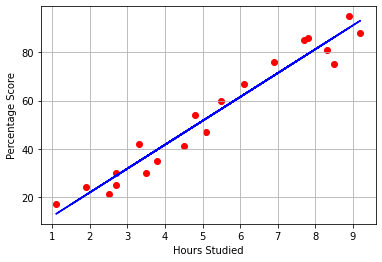

In [17]:
line = l.coef_*x + l.intercept_

#Plotting it in the test data
plt.show()
plt.scatter(x_train, y_train, color="red")
plt.plot(x, line, color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

STEP-6 MAKING PREDICTION

We have trained our algorithm and now we make some prediction.

In [18]:
print(x_test)
y_pred = l.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
#Comparing actual and predicted values
comp = pd.DataFrame({"Actual":[y_test],"Predicted":[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [20]:
#Testing own data
hours = 9.25
own_pred = l.predict([[hours]])
print("No. of hours ={}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

No. of hours =9.25
Predicted score = [93.69173249]


STEP-7 EVALUATING THE MODEL

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn import metrics
print("Mean absolute error:" ,metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error: 4.183859899002982
